<a href="https://colab.research.google.com/github/KatePomazunova/GoIT_HW_DS/blob/main/hw9_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout, BatchNormalization
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.metrics import accuracy_score, precision_score, recall_score
import random

In [22]:
from keras.datasets import fashion_mnist

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
print(x_train.shape)

num_classes = 10
num_features = np.product(x_train.shape[1:])
learning_rate = 0.001
batch_size = 256

steps_per_epoch = len(x_train) // batch_size
print("steps_per_epoch", steps_per_epoch)

x_train, x_test = np.array(x_train, np.float32), np.array(x_test, np.float32)

x_train, x_test = x_train.reshape([-1, num_features]), x_test.reshape([-1, num_features])

x_train, x_test = x_train / 255., x_test / 255.

train_data = tf.data.Dataset.from_tensor_slices((x_train, y_train))
train_data = train_data.repeat().shuffle(5000).batch(batch_size).prefetch(1)


(60000, 28, 28)
steps_per_epoch 234


In [28]:
model = Sequential([
    Dense(1024, activation='relu', input_shape=(num_features,)),
    BatchNormalization(),
    Dropout(0.4),
    Dense(1024, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),
    Dense(512, activation='relu'),
    BatchNormalization(),
    Dense(10, activation='softmax')
])

reduce_lr_cb = ReduceLROnPlateau(monitor='val_accuracy', factor=0.5, patience=10, verbose=1)
early_stopping_cb = EarlyStopping(monitor="val_accuracy", patience=5, restore_best_weights=True)
callbacks = [reduce_lr_cb, early_stopping_cb]

model.compile(optimizer=tf.optimizers.Adam(learning_rate),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [29]:
history = model.fit(train_data,
                    epochs=100,
                    batch_size=batch_size,
                    steps_per_epoch=steps_per_epoch,
                    validation_data=(x_test, y_test),
                    callbacks=callbacks
                    )

Epoch 1/100
234/234 [==============================] - 6s 8ms/step - loss: 0.5086 - accuracy: 0.8194 - val_loss: 0.4395 - val_accuracy: 0.8443 - lr: 0.0010
Epoch 2/100
234/234 [==============================] - 2s 7ms/step - loss: 0.3931 - accuracy: 0.8552 - val_loss: 0.4323 - val_accuracy: 0.8481 - lr: 0.0010
Epoch 3/100
234/234 [==============================] - 2s 7ms/step - loss: 0.3579 - accuracy: 0.8670 - val_loss: 0.4030 - val_accuracy: 0.8522 - lr: 0.0010
Epoch 4/100
234/234 [==============================] - 2s 6ms/step - loss: 0.3414 - accuracy: 0.8743 - val_loss: 0.3801 - val_accuracy: 0.8638 - lr: 0.0010
Epoch 5/100
234/234 [==============================] - 2s 7ms/step - loss: 0.3290 - accuracy: 0.8770 - val_loss: 0.3842 - val_accuracy: 0.8626 - lr: 0.0010
Epoch 6/100
234/234 [==============================] - 2s 7ms/step - loss: 0.3194 - accuracy: 0.8811 - val_loss: 0.3703 - val_accuracy: 0.8690 - lr: 0.0010
Epoch 7/100
234/234 [==============================] - 2s 10ms/s

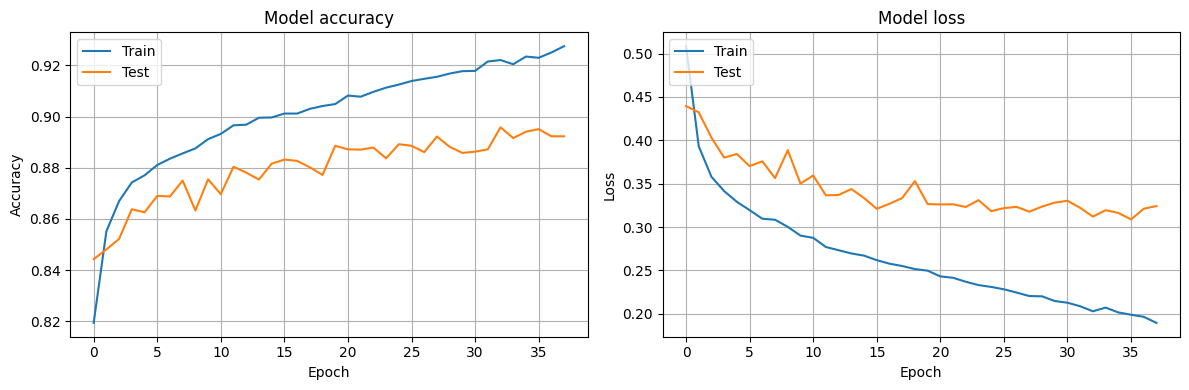

In [30]:
# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.grid()

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.grid()

plt.tight_layout()
plt.show()

In [31]:
pred_test = model(x_test)
predicted_labels = tf.argmax(pred_test, axis=1).numpy()

accuracy = accuracy_score(y_test, predicted_labels)
precision = precision_score(y_test, predicted_labels, average='macro')
recall = recall_score(y_test, predicted_labels, average='macro')

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")


Accuracy: 0.8958
Precision: 0.8975485066565263
Recall: 0.8958


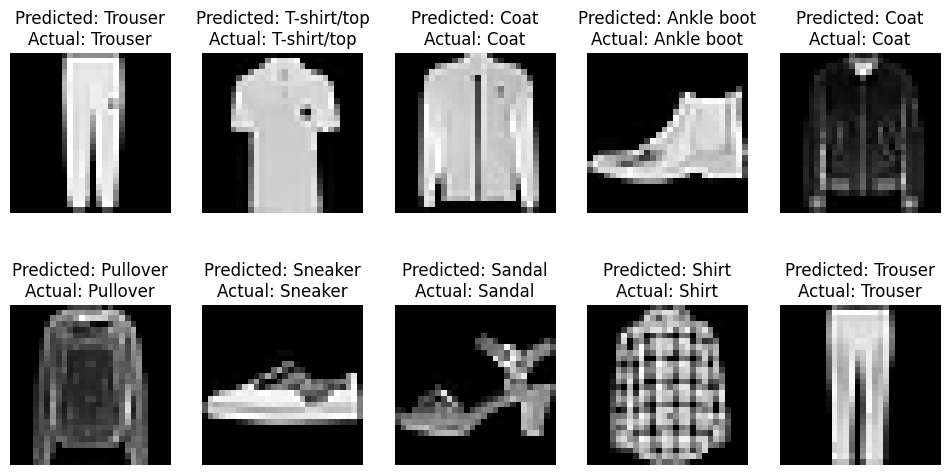

False 0 / 10.
Accuracy: 100.00%


In [38]:
rand_id = random.sample(range(len(x_test)), 10)
test_images = x_test[rand_id]
test_labels = y_test[rand_id]

predictions = model(test_images)
predicted_labels = tf.argmax(predictions, axis=1).numpy()

class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

plt.figure(figsize=(12, 6))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(np.reshape(test_images[i], [28, 28]), cmap='gray')
    plt.title(f'Predicted: {class_names[predicted_labels[i]]}\nActual: {class_names[test_labels[i]]}')
    plt.axis('off')

plt.show()

false_pred= np.sum(predicted_labels != test_labels)
accuracy = 1.0 - (false_pred / 10.0)

print(f"False {false_pred} / 10.")
print(f"Accuracy: {accuracy * 100:.2f}%")